# ML Project 1 : Heart Diseases Detection Using Machine Learning Techniques

**Authors:** Mahmoud Dokmak, Adam Ben Slama, Jianan Xu

In [ ]:
# No external libraries allowed! (e.g. Pandas, Scikit-Learn, PyTorch, TensorFlow, ...).
import numpy as np
from helpers import *
from implementations import *
from myutils import *
from cross_validation import *
from data_processing import *

%load_ext autoreload
%autoreload 2

np.random.seed(42)

# 1. Data Loading

In [ ]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(
    "./data/dataset/", sub_sample=False
)

In [3]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("train_ids shape: ", train_ids.shape)
print("test_ids shape: ", test_ids.shape)

x_train shape:  (328135, 321)
x_test shape:  (109379, 321)
y_train shape:  (328135,)
train_ids shape:  (328135,)
test_ids shape:  (109379,)


# 2. Data Cleaning

In [4]:
# Ensure y_train is a 2D array with one column
y_train_reshaped = y_train.reshape(-1, 1)
y_train_reshaped[y_train_reshaped == -1] = 0
# Concatenate the arrays along the columns (axis=1)
xy_train = np.concatenate((x_train, y_train_reshaped), axis=1)

print(xy_train.shape)
print(np.count_nonzero(xy_train[:, -1] == 1))

(328135, 322)
28975


We remarked that there are many missing values in the dataset. To deal with this issue, we tried to remove rows with missing values. Deleting every row with a missing value will basically delete every row and is not a good solution. By inspection, we found that deleting the rows with more than 60% missing values is the best solution.

In [5]:
# We can see how many samples left if we delete rows if there is one empty. This is useful for report.
mask = ~np.isnan(xy_train).any(axis=1)
xy_train_overcleaned = xy_train[mask]
print(xy_train_overcleaned.shape)

# Delete the rows where more than 60% of the values are nan
empty_rate = 0.6 * xy_train.shape[1]
number_of_nans = np.isnan(xy_train).sum(axis=1)
train_data = xy_train[number_of_nans <= empty_rate]
print(np.count_nonzero(train_data[:, -1] == 1))
print(train_data.shape)

(0, 322)
28396
(318595, 322)


In [6]:
ill_people_in_filtered_dataset = np.sum(train_data[:, -1] == 1)
healthy_people_in_filtered_dataset = np.sum(train_data[:, -1] == 0)

print("Number of ill people in the orginal training set: ", np.sum(y_train == 1))
print("Number of healthy people in the orginal training set: ", np.sum(y_train == 0))
print(
    "Number of ill people in the filtered training set: ",
    ill_people_in_filtered_dataset,
)
print(
    "Number of healthy people in the filtered training set: ",
    healthy_people_in_filtered_dataset,
)
print(
    f"The ratio of ill people in the filtered training set: {ill_people_in_filtered_dataset/train_data.shape[0]:.2f}"
)

Number of ill people in the orginal training set:  28975
Number of healthy people in the orginal training set:  299160
Number of ill people in the filtered training set:  28396
Number of healthy people in the filtered training set:  290199
The ratio of ill people in the filtered training set: 0.09


# 3. EDA

In [7]:
x_train_data = train_data[:, :-1]
y_train_data = train_data[:, -1]
print(x_train_data.shape, y_train_data.shape)

(318595, 321) (318595,)


In [8]:
# Remove columns with all NaNs
feature_mask = np.ones(x_train_data.shape[1], dtype=bool)
feature_mask, features_to_remove = remove_empty_columns(
    x_train_data, y_train_data, feature_mask
)
x_train_removed_empty_columns = x_train_data[:, feature_mask]
print(
    "The shape of the X train after removing empty columns is: ",
    x_train_removed_empty_columns.shape,
)

# Remove the same columns from the test dataset
x_test_removed_empty_columns = x_test[:, feature_mask]
print(
    "The shape of the X test after removing empty columns is: ",
    x_train_removed_empty_columns.shape,
)

# Replace NaNs in the train dataset with the mean of the column
x_train_replaced_nans = replace_nan_with_column_mean(x_train_removed_empty_columns)
print(
    "The shape of the X train after replacing NaN values with the mean of the feature is: ",
    x_train_replaced_nans.shape,
)

# Replace NaNs in the test dataset with the mean of the column
x_test_replaced_nans = replace_nan_with_column_mean(x_test_removed_empty_columns)
print(
    "The shape of the X test after replacing NaN values with the mean of the feature is: ",
    x_train_replaced_nans.shape,
)

# Check if there are any NaN values left
print(
    "Number of NaN values left in the X train: ", np.isnan(x_train_replaced_nans).sum()
)
print("Number of NaN values left in the X test: ", np.isnan(x_test_replaced_nans).sum())

The shape of the X train after removing empty columns is:  (318595, 320)
The shape of the X test after removing empty columns is:  (318595, 320)
Replaced NaN values with the mean of the feature.
The shape of the X train after replacing NaN values with the mean of the feature is:  (318595, 320)
Replaced NaN values with the mean of the feature.
The shape of the X test after replacing NaN values with the mean of the feature is:  (318595, 320)
Number of NaN values left in the X train:  0
Number of NaN values left in the X test:  0


Our reasoning is to replace the NaN values with the mean of the column/feature.

In [9]:
x_cat = x_train_replaced_nans
x_test = x_test_replaced_nans
y = y_train_data
categorical_values_index_raw, correlated_values_index_raw, both_values_index_raw = (
    feature_selection(x_cat, y, 1000, 0.2)
)

Features with less than 1000 unique values : 309
	[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [10]:
proba_map = distribution(x_cat[:, categorical_values_index_raw], y)
# Transform raw data into probabilities
x_train_proba = data_to_distribution(x_cat[:, categorical_values_index_raw], proba_map)
x_test_proba = data_to_distribution(x_test[:, categorical_values_index_raw], proba_map)

In [11]:
print(x_train_proba.shape, x_test_proba.shape)

(318595, 309) (109379, 309)


In [12]:
(
    categorical_values_index_proba,
    correlated_values_index_proba,
    both_values_index_proba,
) = feature_selection(x_train_proba, y, 100, 0.2)

Features with less than 100 unique values : 294
	[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

In [13]:
# The dataset to train the model
training_dataset_all_features = x_train_proba
# The same transformation is applied to the test dataset
testing_dataset_all_features = x_test_proba
# The relevant attributes/features are selected
features_to_keep = correlated_values_index_proba
# Select the attributes used for the training and prediction
print(training_dataset_all_features.shape, testing_dataset_all_features.shape)

(318595, 309) (109379, 309)


In [14]:
training_dataset = training_dataset_all_features[:, features_to_keep]
testing_dataset = testing_dataset_all_features[:, features_to_keep]
print(training_dataset.shape, testing_dataset.shape)

(318595, 16) (109379, 16)


# 4. Data Normalization

One of the most important steps when we want to train a model is to ensure that the data is balanced, which means having the same number of ill and healthy people.

Since there are only 9% of ill people in the filtred dataset, we balance the dataset by either oversample illness samples or undersample healthy samples.

In [15]:
# Undersample healthy samples
print(training_dataset.shape, y.shape)
y_reshaped = y.reshape(-1, 1)
xy_train = np.concatenate((training_dataset, y_reshaped), axis=1)
a = undersample(xy_train)
training_dataset = a[:, :-1]
y = a[:, -1]
# standardize the data
x_train_standardized = standardize(training_dataset)
x_test_standardized = standardize(testing_dataset)
print(x_train_standardized.shape, x_test_standardized.shape)

(318595, 16) (318595,)
(56792, 16) (109379, 16)


The last step before training the model is to standardize the data.

In [16]:
# standardize the data
x_train_standardized = standardize(training_dataset)
x_test_standardized = standardize(testing_dataset)
print(x_train_standardized.shape, x_test_standardized.shape)

(56792, 16) (109379, 16)


We use 5-fold cross validation.

In [22]:
"""
x = x_train_standardized
y=y

# Set number of folds
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed=1)

# Prepare to store results
methods = ['mean_squared_error_gd', 'mean_squared_error_sgd', 'least_squares',
           'ridge_regression', 'logistic_regression', 'reg_logistic_regression', 'svm'] 


results = {}

# Loop over methods
for method in methods:
    print(f"Evaluating method: {method}")
    best_hyperparams, best_metrics = tune_hyperparameters(method, y, x, k_indices, k_fold)
    results[method] = {'best_hyperparams': best_hyperparams, 'metrics': best_metrics}
    print(f"Best hyperparameters for {method}: {best_hyperparams}")
    print(f"Metrics: Accuracy={best_metrics['accuracy']:.4f}, F1 Score={best_metrics['f1_score']:.4f}, Loss={best_metrics['loss']:.4f}")
    print("----------------------------------------------")

# Select the best model
best_method = None
best_f1_score = -np.inf
best_overall_hyperparams = None

for method in methods:
    if results[method]['metrics']['f1_score'] > best_f1_score:
        best_f1_score = results[method]['metrics']['f1_score']
        best_method = method
        best_overall_hyperparams = results[method]['best_hyperparams']

print(f"The best method is: {best_method} with F1 Score: {best_f1_score:.4f}")
print(f"Best hyperparameters: {best_overall_hyperparams}")
"""

Evaluating method: mean_squared_error_gd
Best hyperparameters for mean_squared_error_gd: {'degree': 2, 'gamma': 0.1, 'max_iters': 300}
Metrics: Accuracy=0.3952, F1 Score=0.7713, Loss=0.0812
----------------------------------------------
Evaluating method: mean_squared_error_sgd
Best hyperparameters for mean_squared_error_sgd: {'degree': 1, 'gamma': 0.001, 'max_iters': 5000}
Metrics: Accuracy=0.3745, F1 Score=0.7555, Loss=0.0504
----------------------------------------------
Evaluating method: least_squares
Best hyperparameters for least_squares: {'degree': 4}
Metrics: Accuracy=0.3962, F1 Score=0.7721, Loss=0.0809
----------------------------------------------
Evaluating method: ridge_regression
Best hyperparameters for ridge_regression: {'degree': 4, 'lambda_': 0.007543120063354615}
Metrics: Accuracy=0.3963, F1 Score=0.7725, Loss=0.0811
----------------------------------------------
Evaluating method: logistic_regression
Best hyperparameters for logistic_regression: {'degree': 1, 'gamm

In [18]:
# This is the output cell of the previous cell
# Evaluating method: mean_squared_error_gd
# Best hyperparameters for mean_squared_error_gd: {'degree': 2, 'gamma': 0.1, 'max_iters': 300}
# Metrics: Accuracy=0.3952, F1 Score=0.7713, Loss=0.0812
# ----------------------------------------------
# Evaluating method: mean_squared_error_sgd
# Best hyperparameters for mean_squared_error_sgd: {'degree': 1, 'gamma': 0.001, 'max_iters': 5000}
# Metrics: Accuracy=0.3745, F1 Score=0.7555, Loss=0.0504
# ----------------------------------------------
# Evaluating method: least_squares
# Best hyperparameters for least_squares: {'degree': 4}
# Metrics: Accuracy=0.3962, F1 Score=0.7721, Loss=0.0809
# ----------------------------------------------
# Evaluating method: ridge_regression
# Best hyperparameters for ridge_regression: {'degree': 4, 'lambda_': 0.007543120063354615}
# Metrics: Accuracy=0.3963, F1 Score=0.7725, Loss=0.0811
# ----------------------------------------------
# Evaluating method: logistic_regression
# Best hyperparameters for logistic_regression: {'degree': 1, 'gamma': 1e-05, 'max_iters': 100}
# Metrics: Accuracy=0.5000, F1 Score=0.6667, Loss=0.6929
# ----------------------------------------------
# Evaluating method: reg_logistic_regression
# Best hyperparameters for reg_logistic_regression: {'degree': 1, 'gamma': 1e-05, 'max_iters': 100, 'lambda_': 1e-05}
# Metrics: Accuracy=0.5000, F1 Score=0.6667, Loss=0.6929
# ----------------------------------------------
# Evaluating method: svm
# Best hyperparameters for svm: {'degree': 0, 'C': 10.0, 'learning_rate': 0.001, 'n_iters': 100}
# Metrics: Accuracy=0.4502, F1 Score=0.7691, Loss=6.7005
# ----------------------------------------------
# The best method is: ridge_regression with F1 Score: 0.7725
# Best hyperparameters: {'degree': 4, 'lambda_': 0.007543120063354615}
#


 # 5. Training & Predicting

In [19]:
def predict(y_train, x_train, x_test, method, hyperparams):
    if method == "mean_squared_error_gd":
        gamma = hyperparams["gamma"]
        max_iters = hyperparams["max_iters"]
        initial_w = np.zeros(x_train.shape[1])
        w, __doc__ = mean_squared_error_gd(
            y_train, x_train, initial_w, max_iters, gamma
        )
        y_pred = x_test @ w
        y_pred_labels = np.where(y_pred >= 0, 1, -1)
    elif method == "mean_squared_error_sgd":
        gamma = hyperparams["gamma"]
        max_iters = hyperparams["max_iters"]
        initial_w = np.zeros(x_train.shape[1])
        w, _ = mean_squared_error_sgd(y_train, x_train, initial_w, max_iters, gamma)
        y_pred = x_test @ w
        y_pred_labels = np.where(y_pred >= 0, 1, -1)
    elif method == "least_squares":
        w, _ = least_squares(y_train, x_train)
        y_pred = x_test @ w
        y_pred_labels = np.where(y_pred >= 0, 1, -1)
    elif method == "ridge_regression":
        lambda_ = hyperparams["lambda_"]
        w, _ = ridge_regression(y_train, x_train, lambda_)
        y_pred = x_test @ w
        y_pred_labels = np.where(y_pred >= 0, 1, -1)
    elif method == "logistic_regression":
        gamma = hyperparams["gamma"]
        max_iters = hyperparams["max_iters"]
        initial_w = np.zeros(x_train.shape[1])
        y_train_binary = np.where(y_train == -1, 0, 1)
        w, _ = logistic_regression(y_train_binary, x_train, initial_w, max_iters, gamma)
        y_pred_prob = sigmoid(x_test @ w)
        y_pred_labels = np.where(y_pred_prob >= 0.5, 1, -1)
    elif method == "reg_logistic_regression":
        gamma = hyperparams["gamma"]
        max_iters = hyperparams["max_iters"]
        lambda_ = hyperparams["lambda_"]
        initial_w = np.zeros(x_train.shape[1])
        y_train_binary = np.where(y_train == -1, 0, 1)
        w, _ = reg_logistic_regression(
            y_train_binary, x_train, lambda_, initial_w, max_iters, gamma
        )
        y_pred_prob = sigmoid(x_test @ w)
        y_pred_labels = np.where(y_pred_prob >= 0.5, 1, -1)
    else:
        raise ValueError(f"Unknown method: {method}")

    return y_pred_labels


# The best model
x = x_train_standardized
y = y
x_test_data = x_test_standardized
method = "ridge_regression"
# hyperparams = results[method]['best_hyperparams']
hyperparams = {"degree": 4, "lambda_": 0.007543120063354615}
print(hyperparams["lambda_"])
print(f"Using {method} with hyperparameters: {hyperparams}")
y_pred_labels = predict(y, x, x_test_data, method, hyperparams)
print(y_pred_labels.shape)
create_csv_submission(test_ids, y_pred_labels, "submission.csv")

0.007543120063354615
Using ridge_regression with hyperparameters: {'degree': 4, 'lambda_': 0.007543120063354615}
(109379,)


## Plot

Example of the cross validation process to determine the best hyperparameters for ridge regression. Here is an example to determine the best lambda value for ridge regression with a polynomial degree of 3.

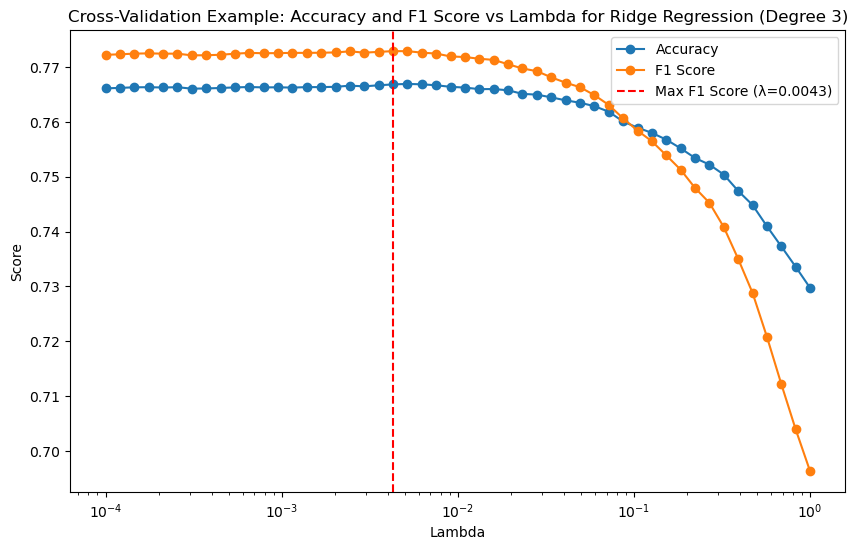

In [20]:
plot_ridge_regression_performance(y, x, degree=3)